# Experiments

## Categorical Variable Encoding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Data/medical_cost_insurance.csv')
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [3]:
dummies = pd.get_dummies(data.sex, drop_first=True)
dummies

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [4]:
data_dummies = pd.concat([data, dummies], axis='columns')
data_dummies

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [5]:
data_dummies.drop(['sex'], axis=1, inplace=True)

## Repeat the above with region column

In [6]:
dummies = pd.get_dummies(data['region'], drop_first=True)
data_dummies = pd.concat([data_dummies, dummies], axis=1)
data_dummies.drop(['region'], axis=1, inplace=True)
data_dummies

,age,bmi,children,smoker,charges,male,northwest,southeast,southwest
0,19,27.900,0,yes,16884.92400,0,0,0,1
1,18,33.770,1,no,1725.55230,1,0,1,0
2,28,33.000,3,no,4449.46200,1,0,1,0
3,33,22.705,0,no,21984.47061,1,1,0,0
4,32,28.880,0,no,3866.85520,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,1,1,0,0
1334,18,31.920,0,no,2205.98080,0,0,0,0
1335,18,36.850,0,no,1629.83350,0,0,1,0
1336,21,25.800,0,no,2007.94500,0,0,0,1


In [7]:
dummies = pd.get_dummies(data_dummies['smoker'], drop_first=True)
data_dummies = pd.concat([data_dummies, dummies], axis=1)
data_dummies.drop(['smoker'], axis=1, inplace=True)
data_dummies

,age,bmi,children,charges,male,northwest,southeast,southwest,yes
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,1,0,0
1336,21,25.800,0,2007.94500,0,0,0,1,0


# Linear Regression

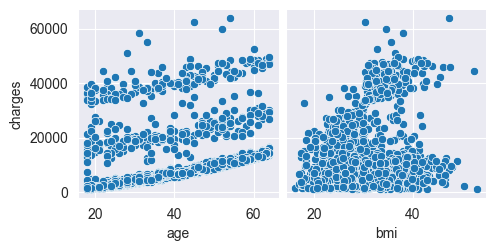

In [8]:
sns.pairplot(data_dummies, y_vars=['charges'], x_vars=['age', 'bmi'], kind='scatter')
plt.show()

In [9]:
quantitative_columns = ['age', 'bmi', 'charges']

<AxesSubplot:>

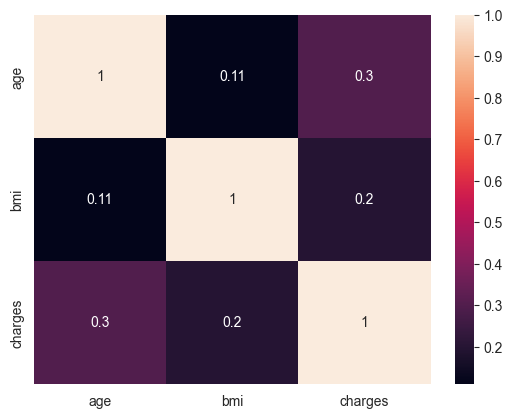

In [10]:
sns.heatmap(data_dummies[quantitative_columns].corr(), annot=True)

In [11]:
X = data_dummies[['bmi']]
X_multiple = data_dummies.drop(['charges'], axis=1)
y = data_dummies['charges']

In [12]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
simple_linear_regression_fit = linear_regression.fit(X, y)

In [13]:
simple_linear_regression_fit.score(X, y)

0.03933913991786253

In [14]:
multiple_linear_regression_fit = linear_regression.fit(X_multiple, y)

In [15]:
multiple_linear_regression_fit.score(X_multiple, y)

0.7509130345985207

In [16]:
X_multiple

,age,bmi,children,male,northwest,southeast,southwest,yes
0,19,27.900,0,0,0,0,1,1
1,18,33.770,1,1,0,1,0,0
2,28,33.000,3,1,0,1,0,0
3,33,22.705,0,1,1,0,0,0
4,32,28.880,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,1,0,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,1,0,0
1336,21,25.800,0,0,0,0,1,0


In [17]:
multiple_linear_regression_fit.predict([[23, 23.1, 0, 1, 1,0,0,0]])

/Users/muhammedmafawalla/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1320.24805178])

# Train and Test Data

In [18]:
X_multiple.head()

,age,bmi,children,male,northwest,southeast,southwest,yes
0,19,27.900,0,0,0,0,1,1
1,18,33.770,1,1,0,1,0,0
2,28,33.000,3,1,0,1,0,0
3,33,22.705,0,1,1,0,0,0
4,32,28.880,0,1,1,0,0,0


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.25)

In [20]:
X_multiple.shape, X_train.shape, X_test.shape

((1338, 8), (1003, 8), (335, 8))

In [21]:
multiple_linear_regression_train_fit = linear_regression.fit(X_train, y_train)
multiple_linear_regression_train_fit

LinearRegression()

In [22]:
multiple_linear_regression_train_fit.score(X_test, y_test)

0.7392471595585155

In [23]:
multiple_linear_regression_train_fit.score(X_train, y_train)

0.7532434548365113

# Logistic Regression

In [24]:
age_insurance = pd.read_csv('../Data/age_insurance.csv')
age_insurance.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


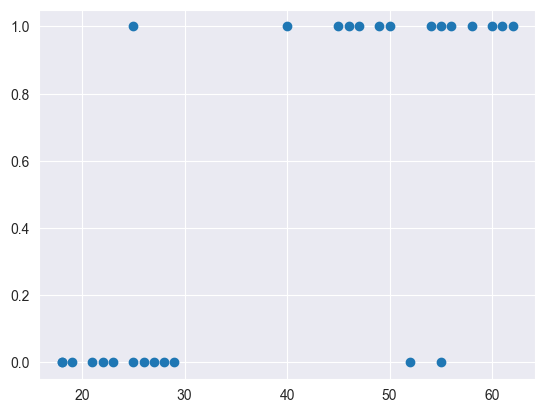

In [25]:
plt.scatter(x=age_insurance['age'], y=age_insurance['bought_insurance'])

In [26]:
from sklearn.linear_model import LinearRegression
X = age_insurance[['age']]
y = age_insurance['bought_insurance']
linear_regression_fit = LinearRegression().fit(X, y)

In [27]:
m = linear_regression_fit.coef_
b = linear_regression_fit.intercept_
print("Coefficient: ", m)
print("Intercept: ", b)
print("Equation: y =",m,"x +", b)

Coefficient:  [0.02368394]
Intercept:  -0.4209443697498303
Equation: y = [0.02368394] x + -0.4209443697498303


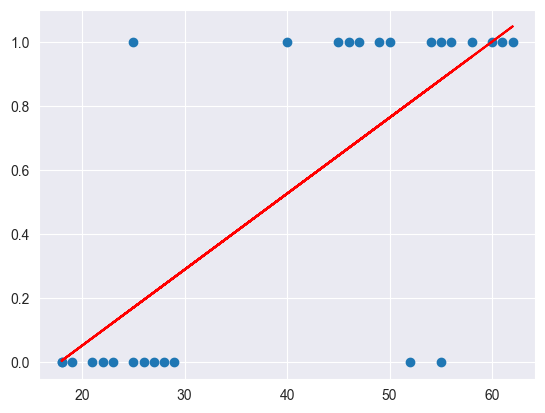

In [28]:
plt.scatter(x=age_insurance['age'], y=age_insurance['bought_insurance'])
plt.plot(age_insurance['age'], m*X+b, c='red')

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(age_insurance[['age']], age_insurance['bought_insurance'], test_size=0.25, random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [31]:
logistic_regression.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1])

In [32]:
logistic_regression.score(X_test, y_test)

1.0

In [33]:
logistic_regression.predict_proba(X_test)

array([[0.38238449, 0.61761551],
       [0.30908506, 0.69091494],
       [0.33268192, 0.66731808],
       [0.15829595, 0.84170405],
       [0.18933736, 0.81066264],
       [0.82901252, 0.17098748],
       [0.43467577, 0.56532423]])

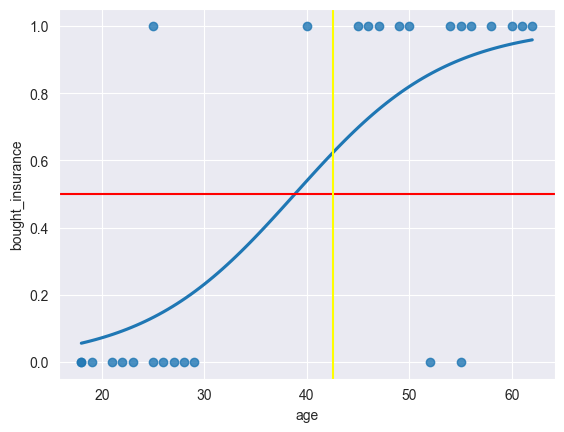

In [34]:
sns.regplot(x=X, y=y, logistic=True, ci=None)
plt.axhline(0.5, c='red')
plt.axvline(42.6, c='yellow')

In [35]:
logistic_regression.predict_proba([[60]])

/Users/muhammedmafawalla/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[0.13151807, 0.86848193]])

# Logistic Regression: Multiclass/Mutinomial

We will train a logistic function model to classify hand written digits

In [36]:
from sklearn.datasets import load_digits

In [37]:
digits = load_digits()

In [38]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [39]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

<Figure size 640x480 with 0 Axes>

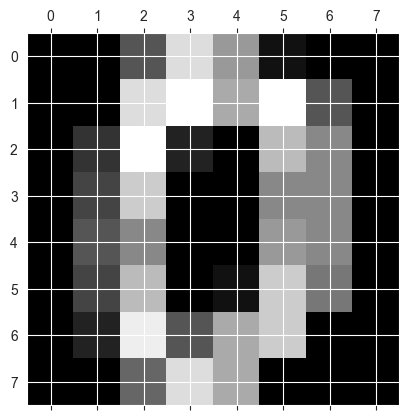

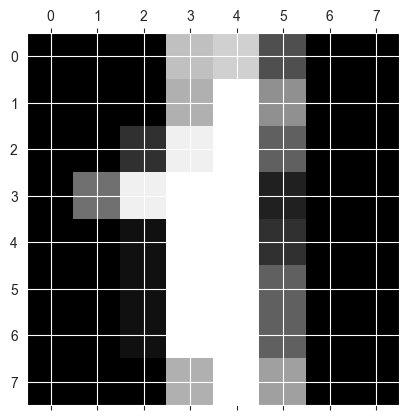

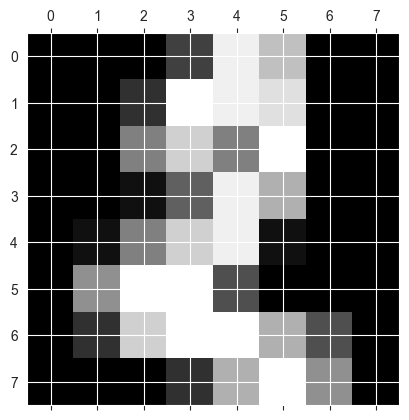

In [40]:
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])

In [41]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [42]:
pd.value_counts(digits.target).sort_index()

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)

In [44]:
len(X_train), len(X_test)

(1437, 360)

In [45]:
from sklearn.linear_model import LogisticRegression
logistic_regression_multi = LogisticRegression(max_iter=2000)
logistic_regression_multi.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [46]:
logistic_regression_multi.score(X_test, y_test)

0.9583333333333334

(<matplotlib.image.AxesImage at 0x150012e10>, 3)

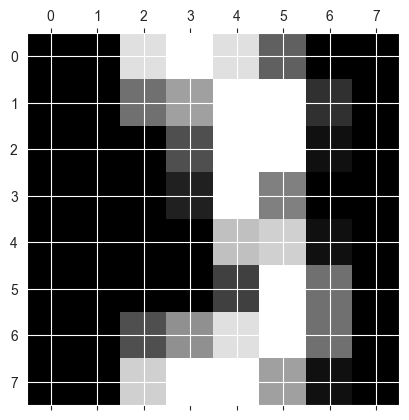

In [47]:
plt.matshow(digits.images[62]), digits.target[62]

In [48]:
logistic_regression_multi.predict(digits.data[[62]])

array([3])

In [49]:
logistic_regression_multi.predict(digits.data[0:5]), digits.target[0:5]

(array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]))

## Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
y_pred = logistic_regression_multi.predict(X_test)

In [51]:
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 8, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 8, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [52]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  1,  0,  2,  1],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 39]])

Text(50.722222222222214, 0.5, 'Truth')

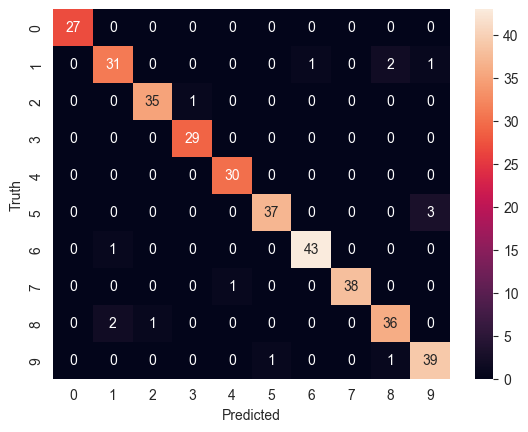

In [53]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
y_test_predicted_merged = pd.DataFrame(data={'Y_test': y_test, 'Y_pred': y_pred})
y_test_predicted_merged

,Y_test,Y_pred
0,2,2
1,8,8
2,2,2
3,6,6
4,6,6
...,...,...
355,5,5
356,4,4
357,3,3
358,8,8


# Decision Trees
We will use decision trees to classify if a person has breast cancer given the feature information from the cell nuclei

In [55]:
breast_cancer = pd.read_csv('../Data/breast_cancer.csv')
breast_cancer.drop(['id'], axis=1, inplace=True)
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [56]:
diagnosis_dummies = pd.get_dummies(breast_cancer.diagnosis, drop_first=True)
diagnosis_dummies

,M
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [71]:
breast_cancer_dummies = pd.concat([breast_cancer, diagnosis_dummies], axis=1)
breast_cancer_dummies.drop(['diagnosis'], inplace=True, axis=1)
breast_cancer_dummies.rename(columns={'M': 'Malignant'}, inplace=True)
breast_cancer_dummies

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [75]:
inputs = breast_cancer_dummies.iloc[:,:-1]
target = breast_cancer_dummies.Malignant

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=0)

In [80]:
from sklearn import tree
classification_tree = tree.DecisionTreeClassifier()
classification_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
classification_tree.score(X_train, y_train)

1.0

In [82]:
classification_tree.score(X_test, y_test)

0.9035087719298246

In [86]:
classification_tree.predict([[11.42, 20.38, 77.58, 386.1, 0.14250, 0.28390, 0.24140, 0.10520, 0.2597, 0.09744, 0.4956, 1.1560, 3.445, 27.23, 0.009110, 0.074580, 0.05661, 0.018670, 0.05963, 0.009208, 14.91, 26.50, 98.87, 567.7, 0.2098, 0.8663, 0.6869, 0.25750, 0.6638, 0.17300]])

/Users/muhammedmafawalla/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=uint8)

# Random Forrest
Classify handwritten digits

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [90]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

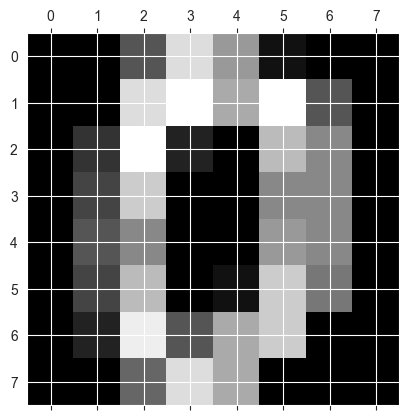

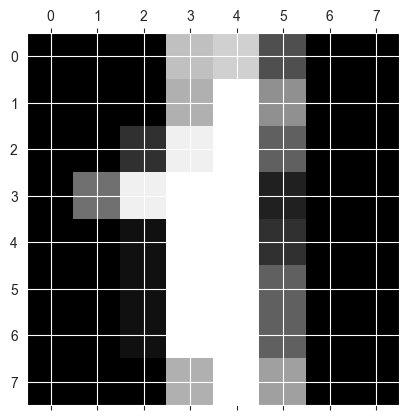

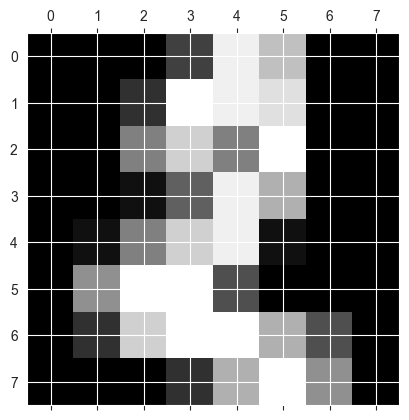

In [92]:
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])

In [94]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [95]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1),df['target'], test_size=0.2, random_state=0)

In [99]:
len(X_train), len(X_test)

(1437, 360)

In [141]:
from sklearn.ensemble import RandomForestClassifier
random_forrest = RandomForestClassifier(n_estimators=200)
random_forrest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [142]:
random_forrest.score(X_test, y_test)

0.975

## Confusion Matrix

In [143]:
y_pred = random_forrest.predict(X_test)

Text(50.722222222222214, 0.5, 'Truth')

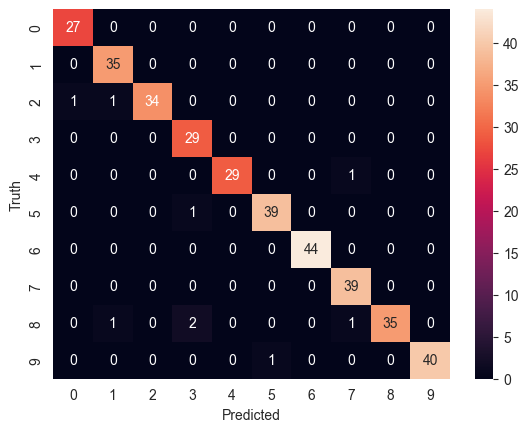

In [150]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [156]:
feature_names = df.drop(['target'], axis=1).columns
feature_imp = pd.Series(random_forrest.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

21    0.049258
43    0.043924
36    0.041103
26    0.040769
28    0.034283
        ...   
31    0.000007
40    0.000004
0     0.000000
39    0.000000
32    0.000000
Length: 64, dtype: float64

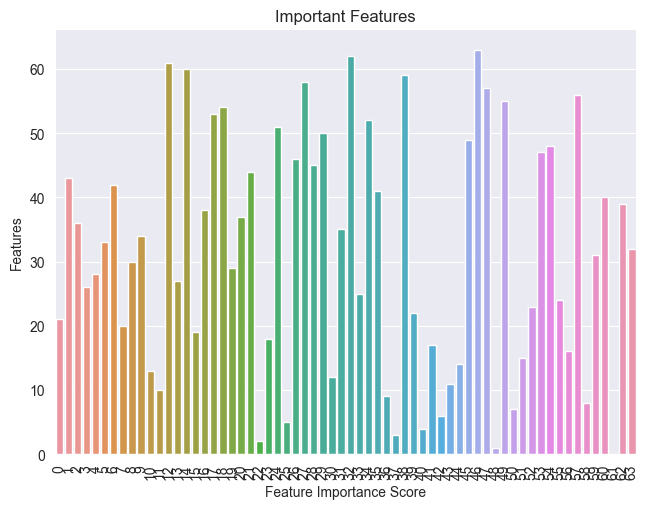

In [163]:
sns.barplot(x=feature_names, y=feature_imp.index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.show()

In [1]:
digits.data

NameError: name 'digits' is not defined